# TP4

In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [42]:
# Load IMDB data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [43]:
# Preprocess data
train_data = pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = pad_sequences(test_data, value=0, padding='post', maxlen=256)

In [44]:
# Prepare training and validation data
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_train = tf.cast(train_labels, 'float32')
y_test = tf.cast(test_labels, 'float32')

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [45]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_8  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Train the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5496 - val_loss: 0.6915 - val_accuracy: 0.6230
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.6026 - val_loss: 0.6858 - val_accuracy: 0.7221
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6796 - accuracy: 0.7462 - val_loss: 0.6730 - val_accuracy: 0.7265
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6604 - accuracy: 0.7555 - val_loss: 0.6498 - val_accuracy: 0.7411
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6299 - accuracy: 0.7780 - val_loss: 0.6168 - val_accuracy: 0.7727
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.8001 - val_loss: 0.5766 - val_accuracy: 0.7866
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5439 - accuracy: 0.8205 - val_loss: 0.5342 - val_accuracy: 0.8147
Epoch 8/20
30/30 [==

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 0s 489us/step - loss: 0.3110 - accuracy: 0.8733
Loss:  0.31101900339126587
Accuracy:  0.8733199834823608


## Visualization

In [52]:
# Plot learning curves
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

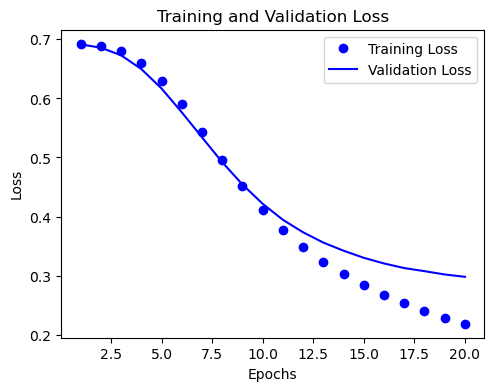

In [53]:
# Plot loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

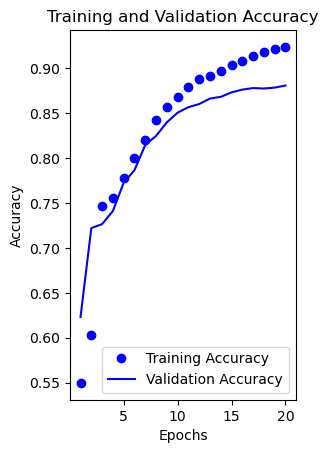

In [54]:
# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()